<a href="https://colab.research.google.com/github/therobinkay/gender_bias_2021/blob/main/2021_10_06_num_pairs_inset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes

In [ ]:
## Load data
y_lst = []
n_lst = []
with open("../data/se_count.csv","r") as f:
    print (next(f))
    for l in f.readlines():
        l_lst = l.split(",")
        y_lst.append(int(l_lst[0]))
        n_lst.append(int(l_lst[1]))

year,count



C:\Users\gsc\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


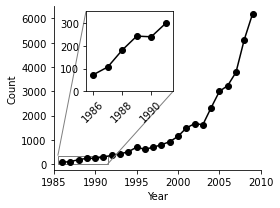

In [ ]:
## Create small figure so typography is scaled up
plt.figure(figsize=(.5*8,.5*6))

ax = plt.axes()
plt.plot(y_lst[3:], n_lst[3:], "-o",color="k")

## I force the lower xlim to be a bit smaller than the one of the inset axis so that the full rectangle is seen
## I think this was the problem with the strange lines in your zoomed inset
plt.xlim(1985,2010)

plt.xlabel("Year")
plt.ylabel("Count")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

## Create inset axis
axins = inset_axes(ax, 
                   width="70%",
                   height="70%", 
                   bbox_to_anchor=(-.00, .3, .6, .7),
                   bbox_transform=ax.transAxes)
plt.sca(axins) ## sca=set current axes

plt.plot(y_lst[3:9], n_lst[3:9], "-o",color="k")

## ylim and xlim will control both the span of the inset axes and the rectangle drawn in main axes
plt.ylim(0,350)
plt.xlim(1985.5,1991.5)

plt.xticks([1986,1988,1990],rotation=45) ## note the rotation
plt.locator_params(axis='y', nbins=4)

## Tool to mark the zoomed part
mark_inset(ax, axins, 
           loc1=2, loc2=4, 
           fc="none", 
           ec="0.5",
           zorder=0,
          lw=1)

plt.tight_layout()

# plt.savefig("../figures/count_sampled_pairs.pdf",transparent=True)
# plt.savefig("../figures/count_sampled_pairs.eps",transparent=True)
# plt.savefig("../figures/count_sampled_pairs.png",transparent=True,dpi=600)
plt.show()